Text(0, 0.5, 'voltage (mV)')

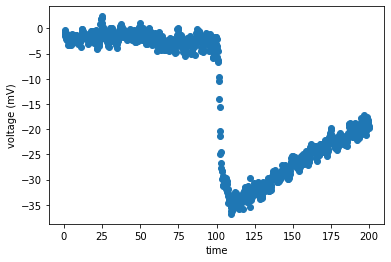

In [64]:
import matplotlib.pyplot as plt
import pylab
import numpy as np
from matplotlib import colors
from scipy.optimize import curve_fit


with open("1.txt") as f:
    events = f.read().split('-- Event')

lines = events[324].split('\n')
time = []
voltage = []
for line in lines[6:1028]:
        
    values = line.split()
    if float(values[3]) > 7.5 and float(values[2]) < 100: #Change accordingly to the base voltage of the Sipm
        continue
    time.append(float(values[2]))
    voltage.append(float(values[3]))
    
plt.scatter(time,voltage)
plt.xlabel('time')
plt.ylabel('voltage (mV)')

0.9807423403631236
4.5354426715941685
1.4550069658529392


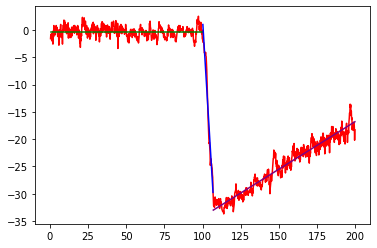

In [20]:
x = np.array([])
y = np.array([])
a = 0
b = 0
def linear(x, m, x0):
    return m * x + x0
def zerom(x,x0):
    return 0*x + x0
def chi2(y,yfit):
    res = 0
    for i in range(len(yfit)):
        res = res + (y[i]-yfit[i])**2/(0.9724)**2 #The denominator should be the unbias Sipm voltage
    return (res / len(yfit))
def exponential(x,a,b,c):
    return (a*np.exp(x*b) + c)

for line in lines[6:1028]:
    values = line.split()
    if float(values[3]) > 7.5 and float(values[2]) < 100: #Change accordingly to the base voltage of the Sipm
        continue
    x = np.append(x,float(values[2]))
    y = np.append(y,float(values[3]))
    if x[a] <= 100:
        a += 1
    if x[b] <= 107:
        b += 1
        
plt.plot(x, y, color='r')

#popt, pcov = curve_fit(linear, x[0:500], y[0:500], p0=(0,0))
#yfit = linear(x, *popt)
#z = chi2(y[0:a],yfit[0:a])
#print(z)
#plt.plot(x[0:500],yfit[0:500], 'b')

popt1, pcov1 = curve_fit(zerom, x[0:a], y[0:a], p0=(0))
y1 = zerom(x[0:a], *popt1)
plt.plot(x[0:a], y1, color='green')
z1 = chi2(y[0:a],y1) # This is chi2 of the model vs. expected zero slope line

popt2, pcov2 = curve_fit(linear, x[a:b], y[a:b], p0=(-1.5,0))
y2 = linear(x[a:b], *popt2)
plt.plot(x[a:b], y2, color='blue')
z2 = chi2(y[a:b],y2)

popt3, pcov3 = curve_fit(linear, x[b:len(x)], y[b:len(x)], p0=(0,0))
y3 = linear(x[b:len(x)], *popt3)
plt.plot(x[b:len(x)], y3, color='purple')
z3 = chi2(y[b:len(x)],y3)

intercept1 = (popt1[0] - popt2[1]) / popt2[0]
intercept = (popt3[1] - popt2[1]) / (popt2[0] - popt3[0])
p2p = popt2[0]*intercept + popt2[1] - popt1[0]
print(z1)
print(z2)
print(z3)

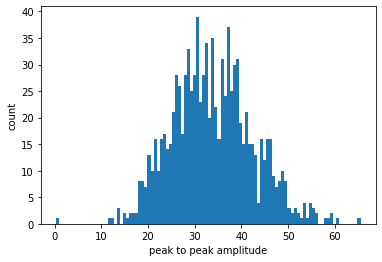

In [56]:
with open("1.txt") as f:
    events = f.read().split('-- Event')

peaktopeak = []    
chi = []
chi1 = []
chi3 = []
eve = []
eves = 0
T0 = []

for event in events:
    if len(event) == 1:
        continue
    eves += 1
    lines = event.split('\n')
    time = []
    voltage = []
    
    x = np.array([])
    y = np.array([])
    a = 0
    b = 0

    for line in lines[6:1028]:
        values = line.split()
        if float(values[3]) > 7.5 and float(values[2]) < 100:
            continue
        x = np.append(x,float(values[2]))
        y = np.append(y,float(values[3]))
        if x[a] <= 100:
            a += 1
        if x[b] <= 107:
            b += 1

    #popt, pcov = curve_fit(linear, x[0:500], y[0:500], p0=(0,0))
    #yfit = linear(x, *popt)
    #z = chi2(y[0:a],yfit[0:a])
    #print(z)
    #plt.plot(x[0:500],yfit[0:500], 'b')

    popt1, pcov1 = curve_fit(zerom, x[0:a], y[0:a], p0=(0))
    y1 = zerom(x[0:a], *popt1)
    z1 = chi2(y[0:a],y1) # z1 > 3 is not acceptable
    chi.append(z1)
    #if z1 > 1.5:
        #if z1 > 2:
        #    eve.append(eves)
        #continue

    popt2, pcov2 = curve_fit(linear, x[a:b], y[a:b], p0=(0,0))
    y2 = linear(x[a:b], *popt2)
    z2 = chi2(y[a:b],y2)
    chi1.append(z2)
    if z2 > 20:
        eve.append(eves)
        continue

    popt3, pcov3 = curve_fit(linear, x[b:len(x)], y[b:len(x)], p0=(0,0))
    y3 = linear(x[b:len(x)], *popt3)
    z3 = chi2(y[b:len(x)],y3)
    chi3.append(z3)

    intercept = (popt3[1] - popt2[1]) / (popt2[0] - popt3[0])
    p2p = popt2[0]*intercept + popt2[1] - popt1[0]
    peaktopeak.append(np.abs(p2p))
    
    intercept1 = (popt1[0] - popt2[1]) / popt2[0]
    T0.append(np.abs(intercept1 - intercept))

plt.hist(peaktopeak, 100)
plt.xlabel('peak to peak amplitude')
plt.ylabel('count')
plt.show()
plt.show()

Text(0, 0.5, 'Entries')

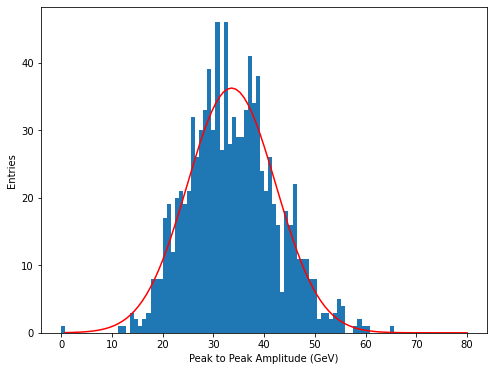

In [57]:
from scipy.optimize import curve_fit
def gaussian(x, amp, mean, sigma):
    return amp * np.exp( -(x - mean)**2 / (2*sigma**2) ) 
fig = plt.figure( figsize=(8, 6), facecolor='w')
hist_data, bins, patches = plt.hist(peaktopeak, bins=100, range=[0, 80])
x = np.linspace(bins[1], bins[-1], 100)
y = hist_data
popt, pcov = curve_fit(gaussian, x, y, p0=(0, 10, 10))
resolution = peaktopeak
y = gaussian(x, *popt)
plt.plot(x, y, color='r')
plt.xlabel('Peak to Peak Amplitude (GeV)')
plt.ylabel('Entries')

Text(0.5, 0, 'Chi2/dof')

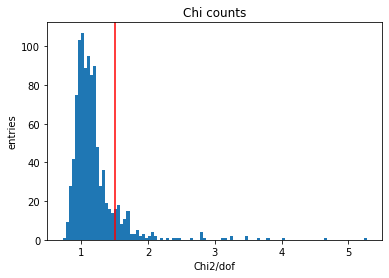

In [58]:
plt.hist(chi,100)
plt.axvline(x = 1.5, color = 'r')
plt.title('Chi counts')
plt.ylabel('entries')
plt.xlabel('Chi2/dof')

Text(0.5, 0, 'Time (ns)')

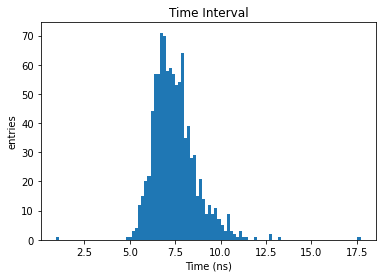

In [59]:
plt.hist(T0,100)
plt.title('Time Interval')
plt.ylabel('entries')
plt.xlabel('Time (ns)')

Text(0.5, 0, 'Chi2/dof')

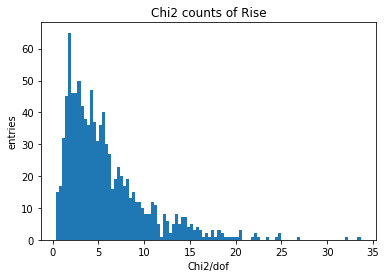

In [60]:
plt.hist(chi1,100)
plt.title('Chi2 counts of Rise')
plt.ylabel('entries')
plt.xlabel('Chi2/dof')

Text(0.5, 0, 'Chi2/dof')

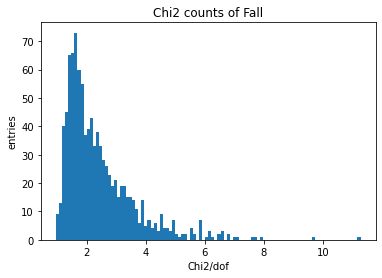

In [61]:
plt.hist(chi3,100)
plt.title('Chi2 counts of Fall')
plt.ylabel('entries')
plt.xlabel('Chi2/dof')

In [62]:
eve

[131, 166, 182, 320, 324, 412, 436, 484, 522, 566, 655, 689, 765, 776, 859]